<a href="https://colab.research.google.com/github/sadeelmu/oncology-diagnostic-prediction-model-wids/blob/main/Oncologymodelwids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [3]:
import pandas as pd

In [5]:
# Read the data
test = pd.read_csv('test.csv')
train = pd.read_csv('training.csv')

In [ ]:
test.shape

(5792, 82)

In [ ]:
test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.0,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             5792 non-null   int64  
 1   patient_race                           2891 non-null   object 
 2   payer_type                             5032 non-null   object 
 3   patient_state                          5771 non-null   object 
 4   patient_zip3                           5792 non-null   int64  
 5   patient_age                            5792 non-null   int64  
 6   patient_gender                         5792 non-null   object 
 7   bmi                                    1777 non-null   float64
 8   breast_cancer_diagnosis_code           5792 non-null   object 
 9   breast_cancer_diagnosis_desc           5792 non-null   object 
 10  metastatic_cancer_diagnosis_code       5792 non-null   object 
 11  meta

In [ ]:
test.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
count,5792.000000,5792.000000,5792.000000,1777.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,...,5792.000000,5792.000000,5791.000000,5791.000000,5792.000000,5792.000000,5792.000000,5778.000000,5778.000000,5778.000000
mean,549946.787983,570.217887,59.274862,28.900073,20266.872152,1510.471786,40.575472,11.119250,12.919191,13.218348,...,18.036444,13.483574,13.435855,4.292997,27.915686,8.636586,7.171897,39.788771,7.435363,15.936645
std,260988.833446,275.314510,13.076323,5.609491,13694.738314,2883.409750,4.029852,1.478579,1.909698,3.294389,...,16.716396,3.693358,5.105505,4.673928,4.997893,4.142770,3.107104,3.486773,1.528655,5.894659
min,100266.000000,101.000000,18.000000,14.000000,829.515152,0.821739,20.600000,0.000000,6.314286,5.925000,...,0.194444,4.600000,3.433333,0.000000,13.722078,2.440000,1.200000,30.939316,2.636008,2.760371
25%,320284.500000,329.000000,50.000000,24.600000,8863.550000,161.925000,37.190476,10.160000,11.726471,10.996226,...,4.698529,10.388889,9.995000,0.878049,24.932500,5.772727,5.078571,37.722740,6.590523,11.100666
50%,553042.000000,554.000000,59.000000,28.150000,18711.016665,626.236667,40.640909,11.039216,12.923944,12.531646,...,11.842623,13.093333,12.218182,2.690196,27.561905,7.468000,7.070370,39.127948,7.666953,15.246437
75%,778552.250000,836.000000,67.000000,32.860000,28996.772730,1612.851111,43.085938,12.143396,13.904830,14.937500,...,27.594872,15.802128,16.444444,5.863830,30.709375,10.820000,8.774510,41.075217,8.276922,20.348878
max,999890.000000,996.000000,91.000000,43.900000,71374.131580,21172.000000,54.570000,16.481818,35.300000,62.100000,...,91.005085,35.155556,38.347826,22.591667,48.020000,27.566102,21.426667,52.237210,11.169408,31.504775


In [ ]:
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [ ]:
train.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


**TNBC FACTORS:**

1. Inherited mutations in certain genes, such as BRCA1 and BRCA2, have been associated with an increased risk of developing breast cancer, including TNBC. These mutations can be passed down through families.

2. Hormones play a significant role in breast cancer development, but TNBC does not typically express hormone receptors (estrogen receptor and progesterone receptor) and is negative for HER2. This makes hormone therapies less effective for TNBC.

3. Women, especially those over the age of 40, are at a higher risk of developing breast cancer. While breast cancer is more common in women, men can also develop the disease.

4. There are variations in breast cancer incidence among different racial and ethnic groups. For example, TNBC is known to occur more frequently in younger African American women.

5. A family history of breast or ovarian cancer can increase the risk of developing TNBC, especially if there is a history of BRCA mutations or other genetic predispositions.

6. TNBC is often associated with a higher histological grade, which means the cancer cells may appear more abnormal under a microscope. Higher-grade tumors are generally more aggressive.

7. Larger tumor size and later stage at the time of diagnosis can increase the risk of metastasis. TNBC is often diagnosed at a more advanced stage compared to other breast cancer subtypes.

8. The presence of cancer cells in the lymph nodes suggests a higher likelihood of metastasis. TNBC may be more prone to lymph node involvement.

9. The response of TNBC to initial treatments, such as surgery, chemotherapy, and radiation, can influence the risk of recurrence and metastasis.

In [ ]:
test.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [ ]:
train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

Percentage of residents in their respective age groups

In [ ]:
print(train[['patient_id','age_40s','age_50s', 'age_60s', 'age_70s', 'age_over_80']])

       patient_id    age_40s    age_50s    age_60s   age_70s  age_over_80
0          475714  11.614286  11.557143   7.571429  4.000000     2.100000
1          349367  13.333333  14.060606  10.248485  5.951515     3.503030
2          138632  12.860000  12.770000  11.426667  6.565000     2.811667
3          617843  12.650000  14.847619  12.280952  8.216667     4.759524
4          817482  12.600000  14.992000  14.836000  9.462000     3.466000
...           ...        ...        ...        ...       ...          ...
12901      674178  11.694118  13.329412  11.764706  6.188235     3.617647
12902      452909  12.817284  13.301235  12.771605  8.413580     4.408642
12903      357486  12.650000  14.847619  12.280952  8.216667     4.759524
12904      935417  12.631579  11.460526   9.789474  6.000000     3.581579
12905      179597  12.903704  11.629630   9.525926  5.466667     2.744444

[12906 rows x 6 columns]


In [ ]:
# import pandas as pd
# df = train
# df['most_prominent_age'] = df[['age_50s', 'age_60s', 'age_70s', 'age_over_80']].idxmax(axis=1)

# overall_most_prominent_age = df[['age_50s', 'age_60s', 'age_70s', 'age_over_80']].sum(axis=0).idxmax()

# print("Overall most prominent age group:", overall_most_prominent_age)

In [ ]:
# df['most_prominent_race'] = df['patient_race']
# overall_most_prominent_race = df['most_prominent_race'].value_counts().idxmax()

# print("Overall most prominent patient race:", overall_most_prominent_race)

In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)

# diagnosed_within_90_days = df[df['DiagPeriodL90D'] == 1]

# print("Statistics for rows where DiagPeriodL90D is 1:")
# print(diagnosed_within_90_days.describe())

# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.width')

Check for missing values in the dataset. For columns like BMI, which have a significant number of missing values, consider imputation strategies

In [ ]:
train.shape

(12906, 83)

In [ ]:
test.shape

(5792, 82)

In [ ]:
train_summary = train.isna().sum()

print(train_summary.to_string(max_rows=train.shape[1]))

patient_id                                   0
patient_race                              6385
payer_type                                1803
patient_state                               51
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                       8965
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
Region                                      52
Division                                    52
population                                   1
density                                      1
age_median                                   1
age_under_10                                 1
age_10_to_19                                 1
age_20s                                      1
age_30s      

In [ ]:
train['Ozone']

0        52.237210
1        42.301121
2        40.108207
3        42.070075
4        41.356058
           ...    
12901    38.753055
12902    36.469947
12903    42.070075
12904    37.722740
12905    37.228624
Name: Ozone, Length: 12906, dtype: float64

In [ ]:
#find breat_cancer_desc where breast_cancer_diagnosis code = C50919

df= train[train['breast_cancer_diagnosis_code'] == 'C50919']
df['breast_cancer_diagnosis_desc']

0        Malignant neoplasm of unsp site of unspecified...
43       Malignant neoplasm of unsp site of unspecified...
57       Malignant neoplasm of unsp site of unspecified...
60       Malignant neoplasm of unsp site of unspecified...
78       Malignant neoplasm of unsp site of unspecified...
                               ...                        
12862    Malignant neoplasm of unsp site of unspecified...
12869    Malignant neoplasm of unsp site of unspecified...
12877    Malignant neoplasm of unsp site of unspecified...
12894    Malignant neoplasm of unsp site of unspecified...
12900    Malignant neoplasm of unsp site of unspecified...
Name: breast_cancer_diagnosis_desc, Length: 1467, dtype: object

Fill 'bmi', 'patient_race', 'payer_type', 'patient_state','region','division', 'Ozone', 'N02' appropriately

In [ ]:
test.shape

(5792, 82)

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Define the age groups as ranges
age_groups = {
    'age_under_10': range(0, 10),
    'age_10_to_19': range(10, 20),
    'age_20s': range(20, 30),
    'age_30s': range(30, 40),
    'age_40s': range(40, 50),
    'age_50s': range(50, 60),
    'age_60s': range(60, 70),
    'age_70s': range(70, 80),
    'age_over_80': range(80, 200)
}

# Function to determine the age group of a patient
def get_age_group(age):
    for age_group, age_range in age_groups.items():
        if age in age_range:
            return age_group
    return None

# Calculate the mean BMI for each age group and store in a dictionary
mean_bmi_per_age_group = {}
for age_group in age_groups:
    # Filter patients belonging to the current age group
    group_patients = df[df['patient_age'].apply(lambda age: age in age_groups[age_group])]
    # Calculate the mean BMI of this group
    mean_bmi_per_age_group[age_group] = group_patients['bmi'].mean()

# Fill missing BMI values based on the patient's age group
train['bmi'] = train.apply(lambda row: mean_bmi_per_age_group[get_age_group(row['patient_age'])]
                     if pd.isna(row['bmi']) else row['bmi'], axis=1)

test['bmi'] = train.apply(lambda row: mean_bmi_per_age_group[get_age_group(row['patient_age'])]
                     if pd.isna(row['bmi']) else row['bmi'], axis=1)

# Check for missing values in 'BMI' column after imputation
missing_after_imputation = train['bmi'].isna().sum()
print("Missing values in BMI after imputation:", missing_after_imputation)

Missing values in BMI after imputation: 0


In [ ]:
test.shape

(5792, 82)

In [ ]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['patient_race', 'payer_type', 'patient_state']

# Create an imputer with the strategy 'most_frequent' for categorical variables
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the selected columns
train[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])
test[columns_to_impute] = imputer.fit_transform(test[columns_to_impute])

In [ ]:
test.shape

(5792, 82)

In [ ]:
from sklearn.impute import SimpleImputer

# List of columns with missing values
columns_to_impute_categorical = ['Region', 'Division']

# Create an imputer with the strategy 'most_frequent' for categorical variables
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the selected columns
train[columns_to_impute_categorical] = imputer_categorical.fit_transform(train[columns_to_impute_categorical])
test[columns_to_impute_categorical] = imputer_categorical.fit_transform(test[columns_to_impute_categorical])

In [ ]:
test.shape

(5792, 82)

In [ ]:
from sklearn.impute import SimpleImputer

# List of columns to impute
columns_to_impute = ['Ozone', 'N02']

# Create an imputer with the strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the selected columns
train[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])
test[columns_to_impute] = imputer.fit_transform(test[columns_to_impute])

In [ ]:
test.shape

(5792, 82)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to the 'breast_cancer_diagnosis_code' column
train['breast_cancer_diagnosis_code'] = label_encoder.fit_transform(train['breast_cancer_diagnosis_code'])
test['breast_cancer_diagnosis_code'] = label_encoder.fit_transform(test['breast_cancer_diagnosis_code'])

In [ ]:
test.shape

(5792, 82)

In [ ]:

label_encoder = LabelEncoder()

# Apply label encoding to the 'metastatic_cancer_diagnosis_coder_diagnosis_code' column
train['metastatic_cancer_diagnosis_code'] = label_encoder.fit_transform(train['metastatic_cancer_diagnosis_code'])
test['metastatic_cancer_diagnosis_code'] = label_encoder.fit_transform(test['metastatic_cancer_diagnosis_code'])

In [ ]:
test.shape

(5792, 82)

In [ ]:
label_encoder = LabelEncoder()

# Apply label encoding to the 'Regionr_diagnosis_code' column
train['Region'] = label_encoder.fit_transform(train['Region'])
test['Region'] = label_encoder.fit_transform(test['Region'])

train['Division'] = label_encoder.fit_transform(train['Division'])
test['Division'] = label_encoder.fit_transform(test['Division'])

In [ ]:
test.shape

(5792, 82)

Drop the breast_cancer_diagnosis_desc column in the context of machine learning, as it is directly corresponds to the breast_cancer_diagnosis_code and each code has a unique description.

In [ ]:
train.drop('breast_cancer_diagnosis_desc', axis=1, inplace=True)
test.drop('breast_cancer_diagnosis_desc', axis=1, inplace=True)

In [ ]:
test.shape

(5792, 81)

Drop gender. All 12906 records are female. Also drop patient_zip as we already have geographical information in patient_state

In [ ]:
#train['patient_gender'].unique()

In [ ]:
train.drop('patient_gender', axis=1, inplace=True)
test.drop('patient_gender', axis=1, inplace=True)

In [ ]:
test.shape

(5792, 80)

In [ ]:
train.drop('patient_zip3', axis=1, inplace=True)
test.drop('patient_zip3', axis=1, inplace=True)

In [ ]:
test.shape

(5792, 79)

Drop these columns as number of missing values is too high 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'

In [ ]:
columns_to_drop = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']

# Drop the specified columns
train = train.drop(columns=columns_to_drop)

In [ ]:
test.shape

(5792, 79)

In [ ]:
# List of columns with one missing value
columns_to_impute = ['population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
                               'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
                               'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size',
                               'family_dual_income', 'income_household_median', 'income_household_under_5',
                               'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20',
                               'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50',
                               'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150',
                               'income_household_150_over', 'income_household_six_figure', 'income_individual_median',
                               'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
                               'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above',
                               'education_stem_degree', 'labor_force_participation', 'unemployment_rate', 'self_employed', 'farmer', 'race_white',
                               'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled',
                               'poverty', 'limited_english', 'commute_time', 'health_uninsured', 'veteran']
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to the selected columns
train[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])
test[columns_to_impute] = imputer.fit_transform(test[columns_to_impute])

# Check if all NaN values are filled
print(test[columns_to_impute].isna().sum())


population          0
density             0
age_median          0
age_under_10        0
age_10_to_19        0
                   ..
poverty             0
limited_english     0
commute_time        0
health_uninsured    0
veteran             0
Length: 64, dtype: int64


In [ ]:
test.shape

(5792, 79)

In [ ]:
train.columns[train.isna().any()]

Index(['PM25'], dtype='object')

In [ ]:
pm25_mean_train = train['PM25'].mean()
pm25_mean_test = test['PM25'].mean()

train['PM25'].fillna(pm25_mean_train, inplace=True)
test['PM25'].fillna(pm25_mean_test, inplace=True)

In [ ]:
train['PM25']

0        8.650555
1        8.487175
2        7.642753
3        7.229393
4        4.110749
           ...   
12901    8.068682
12902    6.265266
12903    7.229393
12904    7.879795
12905    8.652507
Name: PM25, Length: 12906, dtype: float64

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# List of categorical features
categorical_features = ['patient_race', 'payer_type', 'patient_state']  # Update with your actual categorical features

# Apply Label Encoding for each categorical column
label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])

label_encoders_test = {}
for col in categorical_features:
    label_encoders_test[col] = LabelEncoder()
    test[col] = label_encoders_test[col].fit_transform(test[col])

# Exclude columns that should not be scaled (e.g., IDs, encoded categorical columns)
non_scalable_columns = ['patient_id', 'DiagPeriodL90D']  # Add any other non-scalable columns if applicable

# Identify numerical columns (excluding the non-scalable ones)
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in non_scalable_columns]

numerical_columns_test = test.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns_test = [col for col in numerical_columns_test if col not in non_scalable_columns]

# Initialize a scaler
scaler = StandardScaler()

# Scale the numeric columns
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns_test] = scaler.fit_transform(test[numerical_columns])


In [ ]:
train.columns.values

array(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_age', 'bmi', 'breast_cancer_diagnosis_code',
       'metastatic_cancer_diagnosis_code', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s',
       'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married',
       'divorced', 'never_married', 'widowed', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'r

In [ ]:
pd.set_option('display.max_columns', None)

print(train.head())

pd.reset_option('display.max_columns')

   patient_id  patient_race  payer_type  patient_state  patient_age       bmi  \
0      475714      0.491465    0.520526      -1.197690     1.861060 -0.514846   
1      349367      0.491465   -0.739160      -1.197690     0.211229 -0.094721   
2      138632      0.491465   -0.739160       1.446255    -1.213625  2.826483   
3      617843      0.491465   -0.739160      -1.197690    -1.063640  0.095557   
4      817482      0.491465   -0.739160      -0.587549    -0.313717  0.221857   

   breast_cancer_diagnosis_code  metastatic_cancer_diagnosis_code    Region  \
0                      1.045856                          2.128283  1.187051   
1                     -0.105085                         -0.689129  1.187051   
2                     -0.771420                         -0.689129  0.336927   
3                     -0.529117                         -0.689129  1.187051   
4                     -1.437755                         -0.689129  1.187051   

   Division  population   density  age

# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(train.describe())

# Check for missing values
print(train.isna().sum())

# Check for the distribution of the target variable (if it's a classification problem)
print(train['DiagPeriodL90D'].value_counts())

          patient_id  patient_race    payer_type  patient_state   patient_age  \
count   12906.000000  1.290600e+04  1.290600e+04   1.290600e+04  1.290600e+04   
mean   547381.196033 -1.007511e-16 -5.395412e-17   3.193203e-17  7.212234e-17   
std    260404.959974  1.000039e+00  1.000039e+00   1.000039e+00  1.000039e+00   
min    100063.000000 -3.149143e+00 -7.391602e-01  -1.468864e+00 -3.088433e+00   
25%    321517.000000  4.914651e-01 -7.391602e-01  -9.943095e-01 -6.886788e-01   
50%    543522.000000  4.914651e-01 -7.391602e-01  -4.520090e-02 -1.374801e-02   
75%    772671.750000  4.914651e-01  5.205258e-01   8.361142e-01  5.861905e-01   
max    999896.000000  4.914651e-01  1.780212e+00   1.853016e+00  2.386006e+00   

                bmi  breast_cancer_diagnosis_code  \
count  1.290600e+04                  1.290600e+04   
mean  -8.533560e-16                  2.972982e-17   
std    1.000039e+00                  1.000039e+00   
min   -4.503912e+00                 -1.861786e+00   
25%  

Visualization

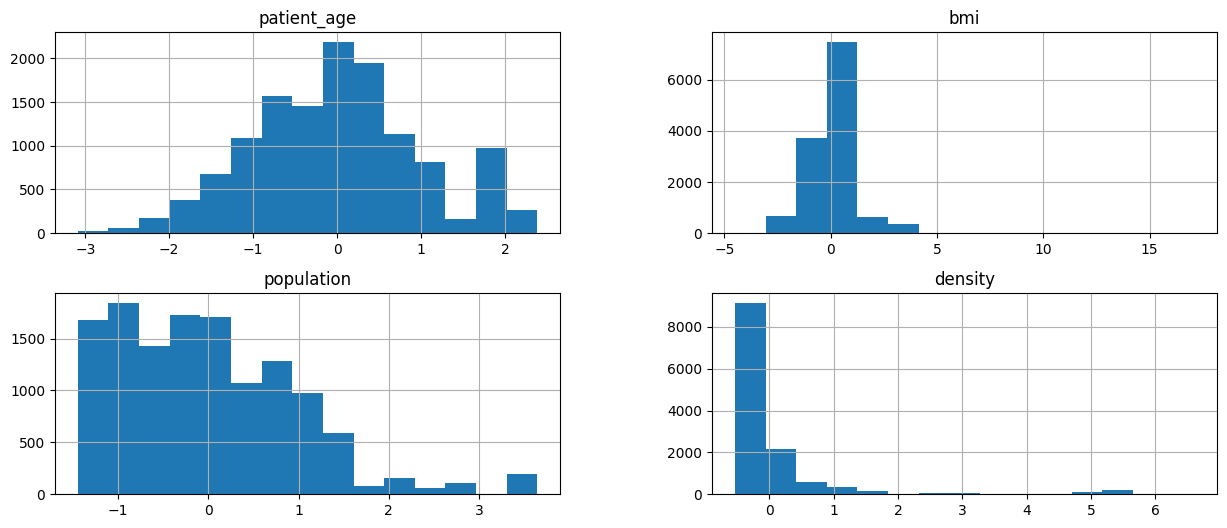

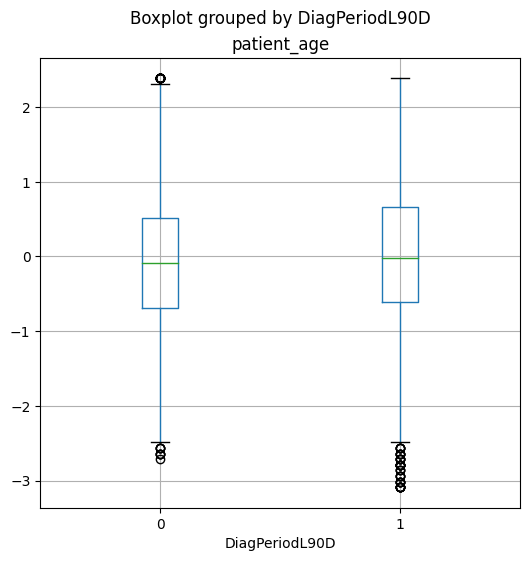

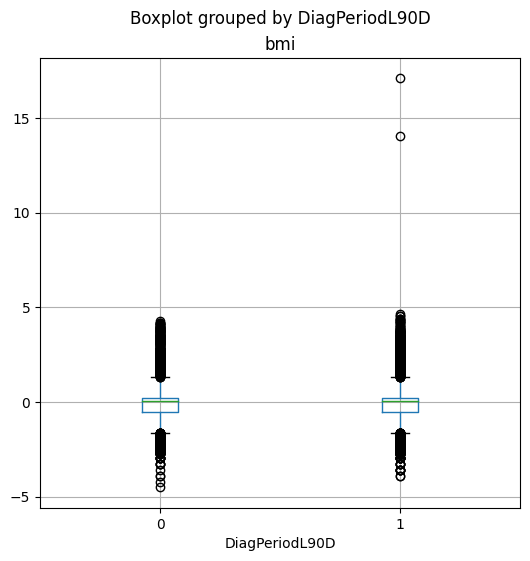

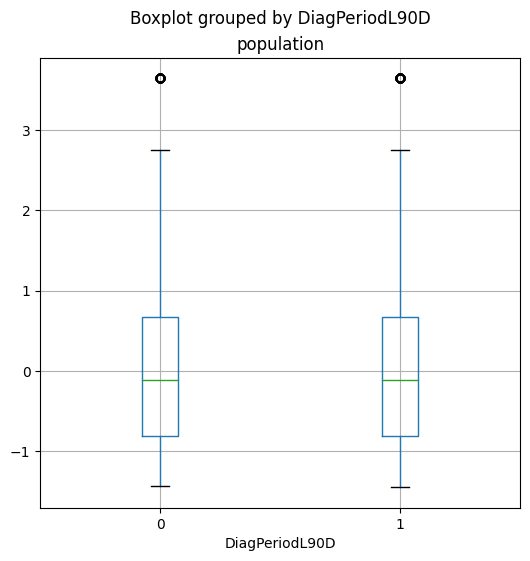

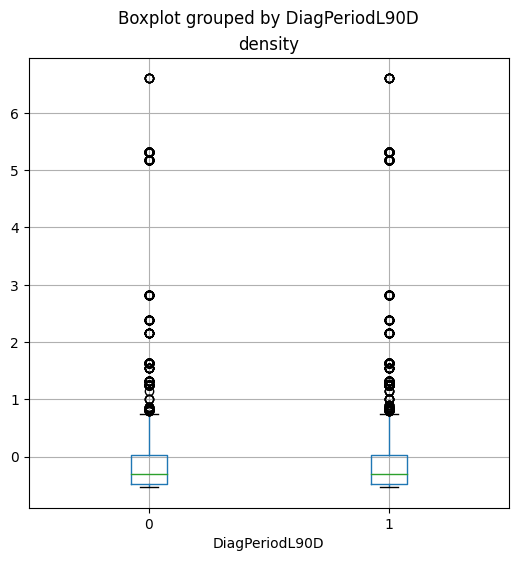

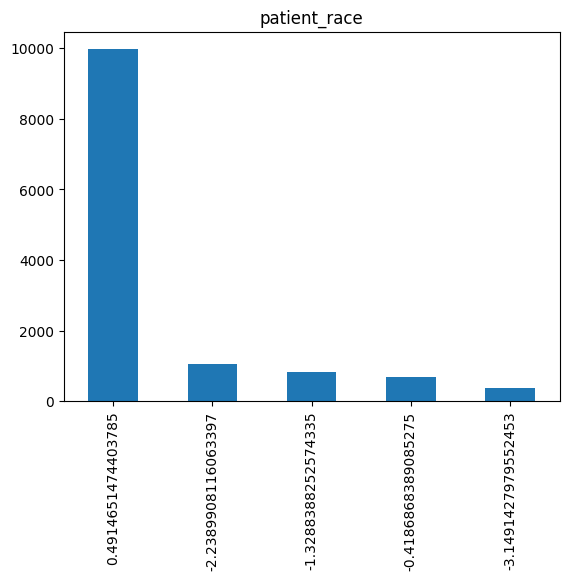

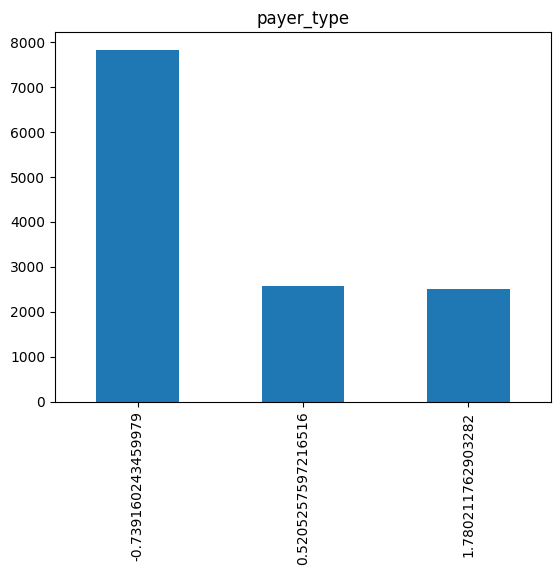

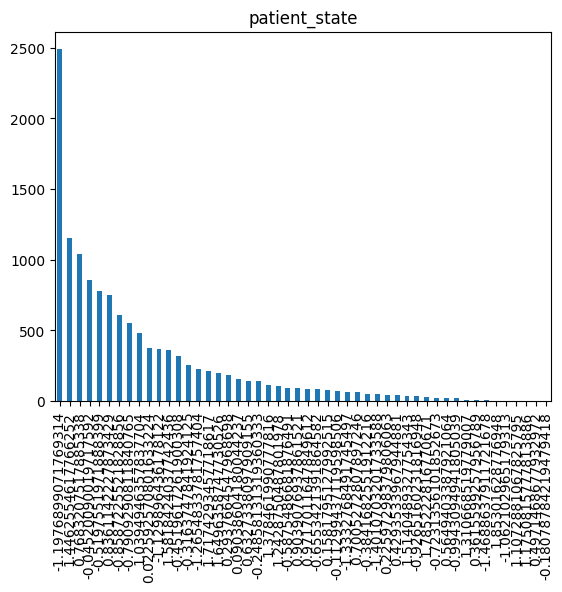

In [ ]:
# Histograms for numerical features
numerical_features = ['patient_age', 'bmi', 'population', 'density']  # Update with your numerical features
train[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))

# Boxplots for numerical features
for col in numerical_features:
    train.boxplot(column=col, by='DiagPeriodL90D', figsize=(6, 6))
    plt.title(col)
    plt.show()

# Bar plots for categorical features
categorical_features = ['patient_race', 'payer_type', 'patient_state']  # Update with your categorical features
for col in categorical_features:
    train[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


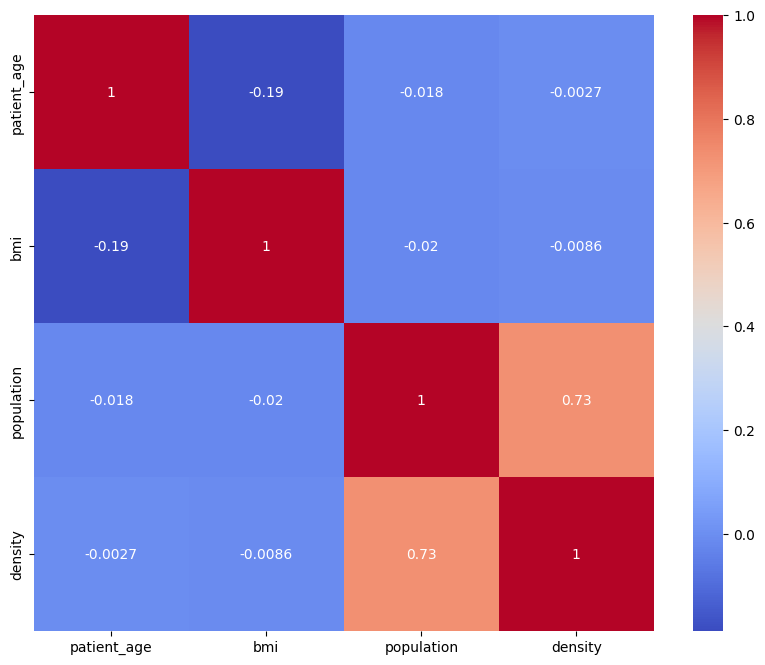

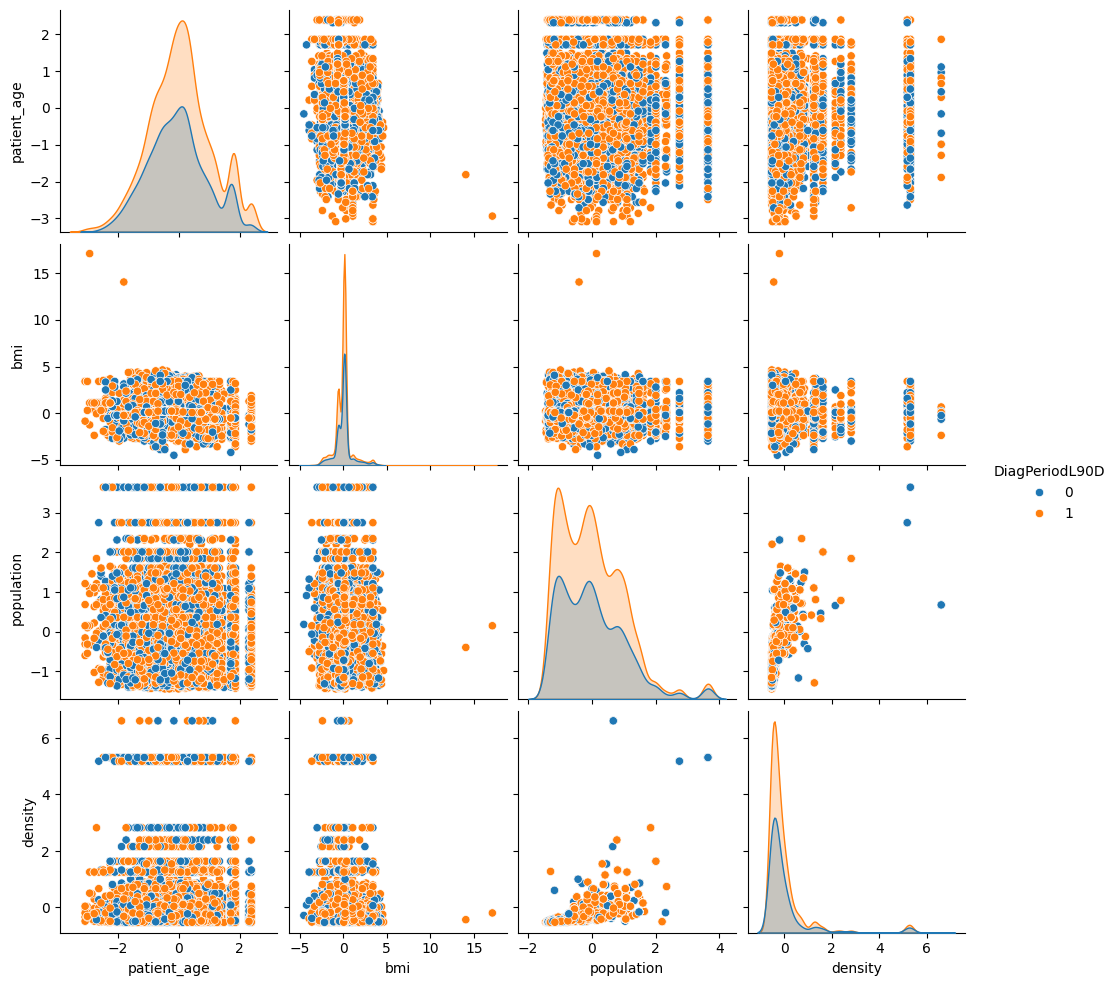

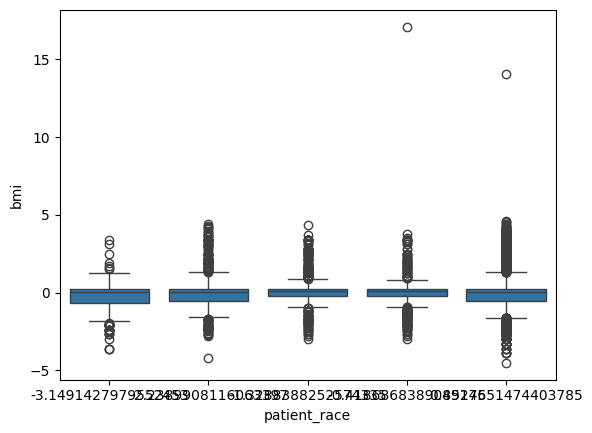

In [ ]:
# Correlation heatmap for numerical features
correlation = train[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# Pairplot (scatterplot matrix) for selected features
sns.pairplot(train[numerical_features + ['DiagPeriodL90D']], hue='DiagPeriodL90D')
plt.show()

# Boxplot for a numerical variable against a categorical variable
sns.boxplot(x='patient_race', y='bmi', data=train)
plt.show()


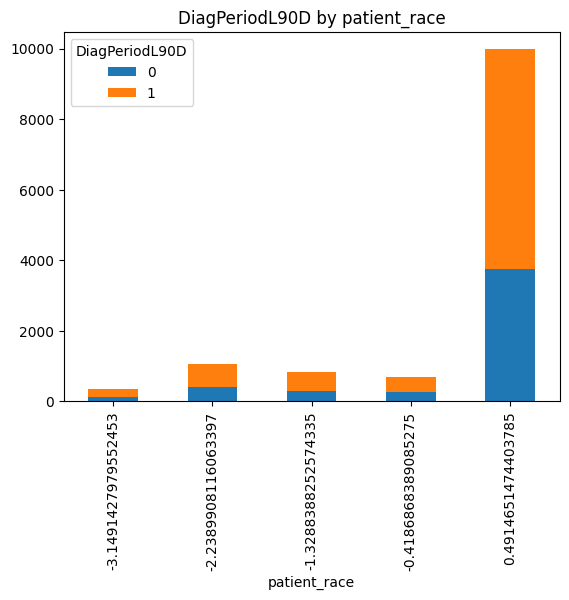

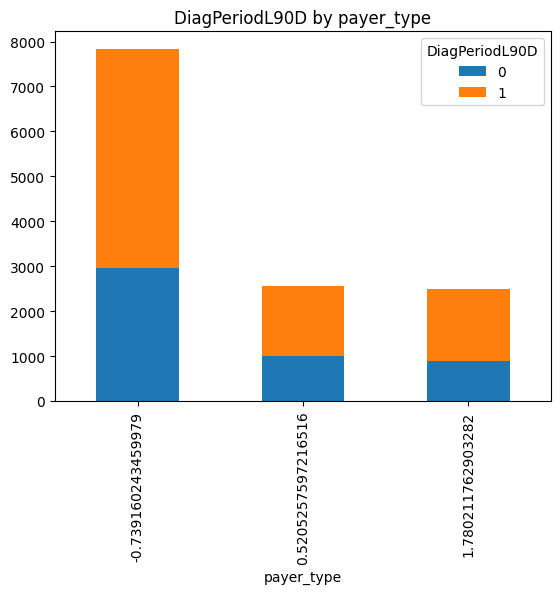

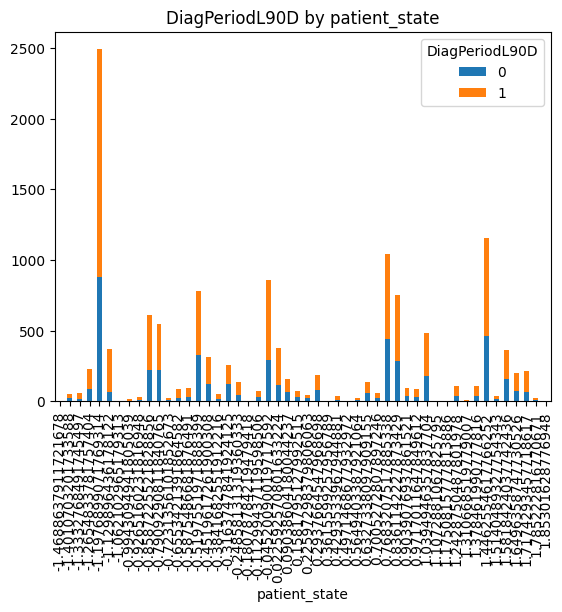

In [ ]:
# Advanced: Relationship between categorical variables and target
for col in categorical_features:
    pd.crosstab(train[col], train['DiagPeriodL90D']).plot(kind='bar', stacked=True)
    plt.title(f'DiagPeriodL90D by {col}')
    plt.show()


In [ ]:
train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_age', 'bmi', 'breast_cancer_diagnosis_code',
       'metastatic_cancer_diagnosis_code', 'Region', 'Division', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_med

# Model Data Preparation

In [ ]:
# feature_columns = [
#     'patient_race', 'payer_type', 'patient_state', 'patient_age', 'bmi',
#     'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code','population', 'density',
#     'age_40s','age_50s','married', 'never_married','labor_force_participation', 'unemployment_rate',
#     'disabled', 'poverty', 'Ozone', 'PM25', 'N02'
# ]

In [ ]:
feature_columns = [
    'patient_race', 'payer_type', 'patient_state', 'patient_age', 'bmi',
    'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code','density',
    'labor_force_participation',
    'disabled', 'poverty', 'Ozone', 'PM25', 'N02'
]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
test.head()

,patient_id,patient_race,payer_type,patient_state,patient_age,bmi,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,0.487661,0.511396,-0.461924,-0.403425,-0.500785,-0.090215,-0.699124,NaN,NaN,...,-0.865807,0.138964,-1.067790,-0.711305,-0.592366,0.531604,0.292500,-0.305519,0.335240,-0.811868
1,593679,0.487661,-0.739450,-0.906021,-0.556387,-0.083378,1.024803,0.506253,NaN,NaN,...,-0.465147,0.686952,0.032405,-0.311854,-0.793013,0.469027,0.685800,-0.824326,0.264372,-0.396917
2,184532,-1.324680,0.511396,-1.202086,0.131940,2.818916,0.955114,-0.699124,NaN,NaN,...,1.776233,-0.971536,-0.572301,1.807617,0.923419,-0.331580,-1.081817,2.159966,1.415073,0.704531
3,447383,-1.324680,1.762242,-1.202086,0.361382,0.105668,1.024803,-0.328239,NaN,NaN,...,1.776233,-0.971536,-0.572301,1.807617,0.923419,-0.331580,-1.081817,2.159966,1.415073,0.704531
4,687972,-2.230850,-0.739450,-1.202086,-1.474155,0.231150,-0.090215,-0.328239,NaN,NaN,...,1.644618,-0.428383,1.434304,2.233668,0.559022,0.411584,-1.332909,0.401527,2.444225,0.969525


In [ ]:
train.isna().sum()

patient_id        0
patient_race      0
payer_type        0
patient_state     0
patient_age       0
                 ..
veteran           0
Ozone             0
PM25              0
N02               0
DiagPeriodL90D    0
Length: 78, dtype: int64

In [ ]:
test.isna().sum()

patient_id          0
patient_race        0
payer_type          0
patient_state       0
patient_age         0
                   ..
health_uninsured    0
veteran             0
Ozone               0
PM25                0
N02                 0
Length: 79, dtype: int64

# Simple Model Prediction

* Best one was SVM

In [ ]:
from imblearn.over_sampling import SMOTE
X_train = train[feature_columns]
y_train = train['DiagPeriodL90D']

X_test = test[feature_columns]

# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Logistic Regression

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression  # or from sklearn.svm import SVC

# # Initialize your model
# model = LogisticRegression()


In [ ]:
# # Assuming X_train_smote and y_train_smote are your training data

# # Initialize RFE with the model and the desired number of features
# selector = RFE(model, n_features_to_select=10, step=1)  # Adjust the number of features

# # Fit RFE
# selector = selector.fit(X_train_smote, y_train_smote)

# # Get the selected features
# selected_features = pd.Series(selector.support_, index=feature_columns)
# print(selected_features[selected_features == True].index)


In [ ]:
# X_train_smote_np = X_train_smote.to_numpy() if isinstance(X_train_smote, pd.DataFrame) else X_train_smote

# # Fit RFE
# selector.fit(X_train_smote_np, y_train_smote)

# # Apply the selector to training and testing set
# X_train_selected = X_train_smote_np[:, selector.support_]

# # Convert X_test to numpy array if it's a DataFrame
# X_test_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
# X_test_selected = X_test_np[:, selector.support_]
# model.fit(X_train_selected, y_train_smote)
# predictions = model.predict_proba(X_test_selected)[:, 1]  # Or .predict() if you want class labels


SVM + PCA

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE

# # Specify your feature column names
# feature_columns = [column_name for column_name in train.columns if column_name != 'DiagPeriodL90D']

# # Separate features and labels in the training data
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']  # Replace 'patient_id' with the actual column name for patient IDs


# # Standardize the features (important before applying PCA)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(train_features)
# X_test_scaled = scaler.transform(test_features)  # Apply the same scaling to the test data

# # Apply SMOTE to handle class imbalance in the training data
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, train_labels)

# # Create a PCA object. The number of components can be chosen based on variance or set to a fixed number
# pca = PCA(n_components=0.95)  # Retain 95% of variance or set to a fixed number like n_components=10

# # Create an SVM classifier
# svm = SVC(kernel='linear', probability=True, random_state=42)  # kernel can be 'linear', 'rbf', etc.

# # Create a pipeline that first applies PCA and then trains an SVM classifier
# pipeline = Pipeline([
#     ('pca', pca),
#     ('svm', svm)
# ])

# # Train the pipeline on the training data
# pipeline.fit(X_train_smote, y_train_smote)

# # Predict probabilities on the test data
# probabilities = pipeline.predict_proba(X_test_scaled)[:, 1]

# # Prepare your submission file with the test features and the predicted probabilities
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Replace with your test patient IDs column
#     'DiagPeriodL90D': probabilities
# })


# submission_df['patient_id'] = submission_df['patient_id'].astype(int)

# # Save to CSV
# submission_df.to_csv('submission_svm_pca.csv', index=False)


In [ ]:
feature_columns

['patient_race',
 'payer_type',
 'patient_state',
 'patient_age',
 'bmi',
 'breast_cancer_diagnosis_code',
 'metastatic_cancer_diagnosis_code',
 'density',
 'labor_force_participation',
 'disabled',
 'poverty',
 'Ozone',
 'PM25',
 'N02']

ML

In [ ]:
!pip install imblearn

In [ ]:
!pip install scikeras


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImblearnPipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Separate features and labels in the training data
train_features = train[feature_columns]
train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# The test data only contains features, so you can use it directly
test_features = test[feature_columns]

# If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
test_patient_ids = test['patient_id']
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),  # input_dim is now directly specified
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
# Assuming 'train_features' and 'train_labels' have been defined

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Define preprocessing for numerical columns: standardization
numerical_cols = train_features.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_cols)], remainder='passthrough')

# Define the ANN model architecture
def build_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=[input_shape]),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier or KerasRegressor for use in the scikit-learn pipeline
# Note: Adjustments are needed here since Keras model requires the input shape which is determined after preprocessing
keras_model = KerasClassifier(model=build_model, epochs=100, batch_size=10, verbose=1)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)

# Build the complete pipeline
pipeline = ImblearnPipeline(steps=[('preprocessor', preprocessor), ('smote', smote), ('model', keras_model)])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model on the validation set
# Note: Evaluation happens automatically at the end of training with the validation_split or validation_data in the Keras model


SVM+ Logistic+ PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Assuming 'train_features' and 'train_labels' are your training data and labels
train_features = train[feature_columns]
train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# The test data only contains features, so you can use it directly
test_features = test[feature_columns]

# If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
test_patient_ids = test['patient_id']
# Prepare the feature sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Define the preprocessing and model pipeline for SVM
svm_pipeline = make_pipeline_imb(
    StandardScaler(),
    PCA(n_components=0.95, random_state=42),
    SMOTE(random_state=42),
    SVC(probability=True, random_state=42)
)

# Define the preprocessing and model pipeline for Logistic Regression
logistic_pipeline = make_pipeline_imb(
    StandardScaler(),
    PCA(n_components=0.95, random_state=42),
    SMOTE(random_state=42),
    LogisticRegression(random_state=42)
)

# Fit the pipelines
svm_pipeline.fit(X_train, y_train)
logistic_pipeline.fit(X_train, y_train)

# Predict probabilities on the validation set
svm_probs = svm_pipeline.predict_proba(X_val)[:, 1]
logistic_probs = logistic_pipeline.predict_proba(X_val)[:, 1]

# Average the probabilities
average_probs = (svm_probs + logistic_probs) / 2

# Evaluate the performance (if y_val is available)
if y_val is not None:
    # Convert average probabilities to binary predictions using a threshold (e.g., 0.5)
    average_preds = (average_probs >= 0.5).astype(int)
    print(classification_report(y_val, average_preds))
# Assuming 'test_features' is your test dataset features without labels

# Standardize and apply PCA transformation, then predict probabilities on the test set
svm_test_probs = svm_pipeline.predict_proba(test_features)[:, 1]
logistic_test_probs = logistic_pipeline.predict_proba(test_features)[:, 1]

# Average the probabilities for the final prediction on the test set
average_test_probs = (svm_test_probs + logistic_test_probs) / 2

# Assuming 'test_patient_ids' contains the patient IDs for the test set
# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
    'DiagPeriodL90D': average_test_probs
})

# Save the DataFrame to a CSV file for submission
submission_df.to_csv('submission_logistic_svm_pca.csv', index=False)


              precision    recall  f1-score   support

           0       0.72      0.63      0.67       965
           1       0.79      0.85      0.82      1617

    accuracy                           0.77      2582
   macro avg       0.75      0.74      0.75      2582
weighted avg       0.76      0.77      0.76      2582



using 6 columns

#CatBoost

In [ ]:
!pip install catboost

In [ ]:

# import pandas as pd
# from catboost import CatBoostClassifier, Pool
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']
# # Prepare the feature sets
# X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# # Define the preprocessing and model pipeline for CatBoost
# catboost_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=0)
# )

# # Fit the pipeline
# catboost_pipeline.fit(X_train, y_train)

# # Predict probabilities on the validation set
# catboost_probs = catboost_pipeline.predict_proba(X_val)[:, 1]

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert CatBoost probabilities to binary predictions using a threshold (e.g., 0.5)
#     catboost_preds = (catboost_probs >= 0.5).astype(int)
#     print(classification_report(y_val, catboost_preds))

# # Assuming 'test_features' is your test dataset features without labels

# # Standardize and apply PCA transformation, then predict probabilities on the test set
# catboost_test_probs = catboost_pipeline.predict_proba(test_features)[:, 1]

# # Assuming 'test_patient_ids' contains the patient IDs for the test set
# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
#     'DiagPeriodL90D': catboost_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_catboost_pca.csv', index=False)


              precision    recall  f1-score   support

           0       0.76      0.62      0.68       965
           1       0.79      0.89      0.84      1617

    accuracy                           0.79      2582
   macro avg       0.78      0.75      0.76      2582
weighted avg       0.78      0.79      0.78      2582



In [ ]:
# import pandas as pd
# from catboost import CatBoostClassifier, Pool
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']

# # Prepare the feature sets
# X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'depth': [4, 6, 8],
#     'l2_leaf_reg': [1, 3, 5]
# }

# grid_search = GridSearchCV(CatBoostClassifier(random_state=42, verbose=0), param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

# # Use the best parameters to train the model
# best_params = grid_search.best_params_
# catboost_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     CatBoostClassifier(iterations=best_params['iterations'],
#                        learning_rate=best_params['learning_rate'],
#                        depth=best_params['depth'],
#                        l2_leaf_reg=best_params['l2_leaf_reg'],
#                        random_state=42, verbose=0)
# )

# # Fit the pipeline
# catboost_pipeline.fit(X_train, y_train)

# # Predict probabilities on the validation set
# catboost_probs = catboost_pipeline.predict_proba(X_val)[:, 1]

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert CatBoost probabilities to binary predictions using a threshold (e.g., 0.5)
#     catboost_preds = (catboost_probs >= 0.5).astype(int)
#     print(classification_report(y_val, catboost_preds))

# # Feature importance analysis
# feature_importances = catboost_pipeline.named_steps['catboostclassifier'].get_feature_importance()
# print("Feature Importances:", feature_importances)

# # Assuming 'test_features' is your test dataset features without labels

# # Standardize and apply PCA transformation, then predict probabilities on the test set
# catboost_test_probs = catboost_pipeline.predict_proba(test_features)[:, 1]

# # Assuming 'test_patient_ids' contains the patient IDs for the test set
# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
#     'DiagPeriodL90D': catboost_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_catboost_pca_tuned.csv', index=False)


Best Parameters: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       965
           1       0.80      0.88      0.84      1617

    accuracy                           0.78      2582
   macro avg       0.77      0.75      0.76      2582
weighted avg       0.78      0.78      0.78      2582

Feature Importances: [ 1.60301065  1.41778982  2.35555386  5.45634842 57.027919    2.46876514
 16.687036    5.14079968  4.07479684  1.095611    1.54983859  1.12253101]


#XGBoost

In [ ]:
!pip install xgboost

In [ ]:
# import pandas as pd
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']
# # Prepare the feature sets
# X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# # Define the preprocessing and model pipeline for XGBoost
# xgboost_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
# )

# # Fit the pipeline
# xgboost_pipeline.fit(X_train, y_train)

# # Predict probabilities on the validation set
# xgboost_probs = xgboost_pipeline.predict_proba(X_val)[:, 1]

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert XGBoost probabilities to binary predictions using a threshold (e.g., 0.5)
#     xgboost_preds = (xgboost_probs >= 0.5).astype(int)
#     print(classification_report(y_val, xgboost_preds))

# # Assuming 'test_features' is your test dataset features without labels

# # Standardize and apply PCA transformation, then predict probabilities on the test set
# xgboost_test_probs = xgboost_pipeline.predict_proba(test_features)[:, 1]

# # Assuming 'test_patient_ids' contains the patient IDs for the test set
# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
#     'DiagPeriodL90D': xgboost_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_xgboost_pca.csv', index=False)


              precision    recall  f1-score   support

           0       0.76      0.61      0.68       965
           1       0.79      0.88      0.83      1617

    accuracy                           0.78      2582
   macro avg       0.77      0.75      0.76      2582
weighted avg       0.78      0.78      0.78      2582



#LightGBM

In [ ]:
!pip install lightgbm

In [ ]:
# import pandas as pd
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']
# # Prepare the feature sets
# X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# # Define the preprocessing and model pipeline for LightGBM
# lightgbm_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
# )

# # Fit the pipeline
# lightgbm_pipeline.fit(X_train, y_train)

# # Predict probabilities on the validation set
# lightgbm_probs = lightgbm_pipeline.predict_proba(X_val)[:, 1]

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert LightGBM probabilities to binary predictions using a threshold (e.g., 0.5)
#     lightgbm_preds = (lightgbm_probs >= 0.5).astype(int)
#     print(classification_report(y_val, lightgbm_preds))

# # Assuming 'test_features' is your test dataset features without labels

# # Standardize and apply PCA transformation, then predict probabilities on the test set
# lightgbm_test_probs = lightgbm_pipeline.predict_proba(test_features)[:, 1]

# # Assuming 'test_patient_ids' contains the patient IDs for the test set
# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
#     'DiagPeriodL90D': lightgbm_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_lightgbm_pca.csv', index=False)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 6443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 12886, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

#AdaBoost

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# # Define the preprocessing and model pipeline for AdaBoost
# adaboost_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     AdaBoostClassifier(random_state=42)
# )

# # Fit the pipelines
# svm_pipeline.fit(X_train, y_train)
# logistic_pipeline.fit(X_train, y_train)
# adaboost_pipeline.fit(X_train, y_train)

# # Predict probabilities on the validation set
# svm_probs = svm_pipeline.predict_proba(X_val)[:, 1]
# logistic_probs = logistic_pipeline.predict_proba(X_val)[:, 1]
# adaboost_probs = adaboost_pipeline.predict_proba(X_val)[:, 1]

# # Average the probabilities
# average_probs = (svm_probs + logistic_probs + adaboost_probs) / 3

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert average probabilities to binary predictions using a threshold (e.g., 0.5)
#     average_preds = (average_probs >= 0.5).astype(int)
#     print(classification_report(y_val, average_preds))

# # Predict probabilities on the test set
# svm_test_probs = svm_pipeline.predict_proba(test_features)[:, 1]
# logistic_test_probs = logistic_pipeline.predict_proba(test_features)[:, 1]
# adaboost_test_probs = adaboost_pipeline.predict_proba(test_features)[:, 1]

# # Average the probabilities for the final prediction on the test set
# average_test_probs = (svm_test_probs + logistic_test_probs + adaboost_test_probs) / 3

# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,
#     'DiagPeriodL90D': average_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_logistic_svm_adaboost_pca.csv', index=False)


              precision    recall  f1-score   support

           0       0.72      0.63      0.67       965
           1       0.79      0.85      0.82      1617

    accuracy                           0.77      2582
   macro avg       0.75      0.74      0.75      2582
weighted avg       0.76      0.77      0.76      2582



In [ ]:
# import pandas as pd
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']
# # Prepare the feature sets
# X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# # Define the preprocessing and model pipeline for AdaBoost
# adaboost_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     AdaBoostClassifier(n_estimators=50, random_state=42)
# )

# # Fit the pipeline
# adaboost_pipeline.fit(X_train, y_train)

# # Predict probabilities on the validation set
# adaboost_probs = adaboost_pipeline.predict_proba(X_val)[:, 1]

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert AdaBoost probabilities to binary predictions using a threshold (e.g., 0.5)
#     adaboost_preds = (adaboost_probs >= 0.5).astype(int)
#     print(classification_report(y_val, adaboost_preds))

# # Assuming 'test_features' is your test dataset features without labels

# # Standardize and apply PCA transformation, then predict probabilities on the test set
# adaboost_test_probs = adaboost_pipeline.predict_proba(test_features)[:, 1]

# # Assuming 'test_patient_ids' contains the patient IDs for the test set
# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
#     'DiagPeriodL90D': adaboost_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_adaboost_pca.csv', index=False)


              precision    recall  f1-score   support

           0       0.67      0.65      0.66       965
           1       0.80      0.81      0.80      1617

    accuracy                           0.75      2582
   macro avg       0.73      0.73      0.73      2582
weighted avg       0.75      0.75      0.75      2582



#OneR

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.base import clone

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']
# # Prepare the feature sets
# X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# # Define the preprocessing and model pipeline for OneR
# oner_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     DecisionTreeClassifier(random_state=42)
# )

# # Fit the pipeline
# oner_pipeline.fit(X_train, y_train)

# # Extract the most important feature according to the OneR model
# most_important_feature = oner_pipeline.named_steps['decisiontreeclassifier'].feature_importances_.argmax()

# # Use only the most important feature for prediction
# X_train_important = X_train.iloc[:, most_important_feature].values.reshape(-1, 1)
# X_val_important = X_val.iloc[:, most_important_feature].values.reshape(-1, 1)
# X_test_important = test_features.iloc[:, most_important_feature].values.reshape(-1, 1)

# # Fit a new model using only the most important feature
# oner_model = clone(oner_pipeline)
# oner_model.fit(X_train_important, y_train)

# # Predict probabilities on the validation set
# oner_probs = oner_model.predict_proba(X_val_important)[:, 1]

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert OneR probabilities to binary predictions using a threshold (e.g., 0.5)
#     oner_preds = (oner_probs >= 0.5).astype(int)
#     print(classification_report(y_val, oner_preds))

# # Predict probabilities on the test set
# oner_test_probs = oner_model.predict_proba(X_test_important)[:, 1]

# # Assuming 'test_patient_ids' contains the patient IDs for the test set
# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
#     'DiagPeriodL90D': oner_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_oner.csv', index=False)


              precision    recall  f1-score   support

           0       0.40      0.32      0.36       965
           1       0.64      0.72      0.68      1617

    accuracy                           0.57      2582
   macro avg       0.52      0.52      0.52      2582
weighted avg       0.55      0.57      0.56      2582



#Naive Bayes

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import classification_report

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']
# # Prepare the feature sets
# X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# # Define the preprocessing and model pipeline for Naive Bayes
# naive_bayes_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     GaussianNB()
# )

# # Fit the pipeline
# naive_bayes_pipeline.fit(X_train, y_train)

# # Predict probabilities on the validation set
# naive_bayes_probs = naive_bayes_pipeline.predict_proba(X_val)[:, 1]

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert Naive Bayes probabilities to binary predictions using a threshold (e.g., 0.5)
#     naive_bayes_preds = (naive_bayes_probs >= 0.5).astype(int)
#     print(classification_report(y_val, naive_bayes_preds))

# # Assuming 'test_features' is your test dataset features without labels

# # Standardize and apply PCA transformation, then predict probabilities on the test set
# naive_bayes_test_probs = naive_bayes_pipeline.predict_proba(test_features)[:, 1]

# # Assuming 'test_patient_ids' contains the patient IDs for the test set
# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
#     'DiagPeriodL90D': naive_bayes_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_naive_bayes_pca.csv', index=False)


              precision    recall  f1-score   support

           0       0.68      0.65      0.67       965
           1       0.80      0.82      0.81      1617

    accuracy                           0.76      2582
   macro avg       0.74      0.74      0.74      2582
weighted avg       0.75      0.76      0.76      2582



#Random Forest Classifier

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']
# # Prepare the feature sets
# X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# # Define the preprocessing and model pipeline for Random Forest
# random_forest_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
# )

# # Fit the pipeline
# random_forest_pipeline.fit(X_train, y_train)

# # Predict probabilities on the validation set
# random_forest_probs = random_forest_pipeline.predict_proba(X_val)[:, 1]

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert Random Forest probabilities to binary predictions using a threshold (e.g., 0.5)
#     random_forest_preds = (random_forest_probs >= 0.5).astype(int)
#     print(classification_report(y_val, random_forest_preds))

# # Assuming 'test_features' is your test dataset features without labels

# # Standardize and apply PCA transformation, then predict probabilities on the test set
# random_forest_test_probs = random_forest_pipeline.predict_proba(test_features)[:, 1]

# # Assuming 'test_patient_ids' contains the patient IDs for the test set
# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
#     'DiagPeriodL90D': random_forest_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_random_forest_pca.csv', index=False)


              precision    recall  f1-score   support

           0       0.76      0.61      0.68       965
           1       0.79      0.88      0.84      1617

    accuracy                           0.78      2582
   macro avg       0.77      0.75      0.76      2582
weighted avg       0.78      0.78      0.78      2582



In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import make_pipeline as make_pipeline_imb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# import pandas as pd

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[['breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'patient_zip3', 'patient_age', 'payer_type', 'patient_state', 'patient_race']]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[['breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'patient_zip3', 'patient_age', 'payer_type', 'patient_state', 'patient_race']]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']

# # Identify categorical columns
# categorical_columns = ['patient_zip3', 'payer_type', 'patient_state', 'patient_race']

# # Separate categorical and numeric features
# numeric_features = train_features.drop(columns=categorical_columns)
# categorical_features = train_features[categorical_columns]

# # One-hot encode categorical features
# encoder = OneHotEncoder(drop='first', sparse=False)
# categorical_encoded = pd.DataFrame(encoder.fit_transform(categorical_features), columns=encoder.get_feature_names_out(categorical_columns))

# # Combine numeric and encoded categorical features
# train_features_encoded = pd.concat([numeric_features, categorical_encoded], axis=1)

# # Prepare the feature sets
# X_train, X_val, y_train, y_val = train_test_split(train_features_encoded, train_labels, test_size=0.2, random_state=42)

# # Define the preprocessing and model pipeline for SVM
# svm_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     SVC(probability=True, random_state=42)
# )

# # Define the preprocessing and model pipeline for Logistic Regression
# logistic_pipeline = make_pipeline_imb(
#     StandardScaler(),
#     PCA(n_components=0.95, random_state=42),
#     SMOTE(random_state=42),
#     LogisticRegression(random_state=42)
# )

# # Fit the pipelines
# svm_pipeline.fit(X_train, y_train)
# logistic_pipeline.fit(X_train, y_train)

# # Predict probabilities on the validation set
# svm_probs = svm_pipeline.predict_proba(X_val)[:, 1]
# logistic_probs = logistic_pipeline.predict_proba(X_val)[:, 1]

# # Average the probabilities
# average_probs = (svm_probs + logistic_probs) / 2

# # Evaluate the performance (if y_val is available)
# if y_val is not None:
#     # Convert average probabilities to binary predictions using a threshold (e.g., 0.5)
#     average_preds = (average_probs >= 0.5).astype(int)
#     print(classification_report(y_val, average_preds))

# # One-hot encode categorical features in the test set
# categorical_encoded_test = pd.DataFrame(encoder.transform(test_features[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

# # Combine numeric and encoded categorical features in the test set
# test_features_encoded = pd.concat([test_features.drop(columns=categorical_columns), categorical_encoded_test], axis=1)

# # Standardize and apply PCA transformation, then predict probabilities on the test set
# svm_test_probs = svm_pipeline.predict_proba(test_features_encoded)[:, 1]
# logistic_test_probs = logistic_pipeline.predict_proba(test_features_encoded)[:, 1]

# # Average the probabilities for the final prediction on the test set
# average_test_probs = (svm_test_probs + logistic_test_probs) / 2

# # Assuming 'test_patient_ids' contains the patient IDs for the test set
# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,  # Ensure this matches the ID column name in your test dataset
#     'DiagPeriodL90D': average_test_probs
# })

# # Save the DataFrame to a CSV file for submission
# submission_df.to_csv('submission_logistic_svm_pca.csv', index=False)


KeyError: "['patient_zip3'] not in index"

Ensemble Method

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import StackingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE

# # Assuming 'train_features' and 'train_labels' are your training data and labels
# train_features = train[feature_columns]
# train_labels = train['DiagPeriodL90D']  # Replace with the name of your target variable

# # The test data only contains features, so you can use it directly
# test_features = test[feature_columns]

# # If you have a patient_id column that you need to retain for submission, make sure to save it before any transformations
# test_patient_ids = test['patient_id']
# X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# # Define base learners for the stacking ensemble
# base_learners = [
#     ('svm', SVC(probability=True, random_state=42)),
#     ('logistic', LogisticRegression(random_state=42))
# ]

# # Define the meta-learner
# meta_learner = LogisticRegression(random_state=42)

# # Create the stacking ensemble
# stack_model = StackingClassifier(
#     estimators=base_learners,
#     final_estimator=meta_learner,
#     cv=5
# )

# # Train the stacking model
# stack_model.fit(X_train_smote, y_train_smote)

# # Evaluate the model on the validation set
# val_predictions = stack_model.predict(X_val_scaled)
# val_probabilities = stack_model.predict_proba(X_val_scaled)[:, 1]

# # Print classification report
# print(classification_report(y_val, val_predictions))


# # Prepare submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test_patient_ids,
#     'DiagPeriodL90D': val_probabilities
# })

# # Save the DataFrame to a CSV file
# submission_df.to_csv('ensemble_submission.csv', index=False)

In [ ]:
# submission_df = pd.DataFrame({
#     'patient_id': test['patient_id'],
#     'DiagPeriodL90D': predictions
# })

In [ ]:
# # Ensure patient_id is an integer
# submission_df['patient_id'] = submission_df['patient_id'].astype(int)

# # Save to CSV
# submission_df.to_csv('submission_svm_pca.csv', index=False)


Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# random_forest = RandomForestClassifier(random_state=42)
# random_forest.fit(X_train_smote, y_train_smote)

# # Get probabilities for the positive class (e.g., class 1)
# probabilities = random_forest.predict_proba(X_test)[:, 1]


Gradient Boosting


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# # Train the Gradient Boosting Classifier
# gradient_boosting = GradientBoostingClassifier(random_state=42)
# gradient_boosting.fit(X_train_smote, y_train_smote)

# # Get probabilities for the positive class
# probabilities = gradient_boosting.predict_proba(X_test)[:, 1]


Logistic Regression + Support Vector Machines


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# log_reg = LogisticRegression(random_state=42)
# log_reg.fit(X_train_smote, y_train_smote)

# # Evaluate the model
# # Generate prediction probabilities
# # The output will have two columns: one for each class (0 and 1)
# # We're interested in the probability of the positive class (1)
# probabilities_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Get the probability for class 1


In [ ]:
# from sklearn.svm import SVC

# # Initialize the SVC model with probability estimation enabled
# svm_model = SVC(random_state=42, probability=True)

# # Fit the model
# svm_model.fit(X_train_smote, y_train_smote)
# # Get probabilities for the positive class
# probabilities_svm = svm_model.predict_proba(X_test)[:, 1]


In [ ]:
# # Create a submission DataFrame
# submission_df = pd.DataFrame({
#     'patient_id': test['patient_id'],
#     'DiagPeriodL90D': probabilities
# })


# Machine Learning M1

In [ ]:
# !pip install tensorflow

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Assuming 'train' is your preprocessed training DataFrame

# # Normalizing the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(train[feature_columns])
# y_train = train['DiagPeriodL90D'].values

# # Splitting the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# # Define the model
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


In [ ]:
# X_test = scaler.transform(test[feature_columns])
# test_predictions = model.predict(X_test)


In [ ]:
# submission_df = pd.DataFrame({
#     'patient_id': test['patient_id'],
#     'DiagPeriodL90D': test_predictions.ravel()  # Use ravel() to convert it to 1D array if necessary
# })
# submission_df.to_csv('submission_simpleNN.csv', index=False)

# CatBoost

In [ ]:
print(train.describe(include='all'))


          patient_id  patient_race    payer_type  patient_state   patient_age  \
count    9613.000000  9.613000e+03  9.613000e+03   9.613000e+03  9.613000e+03   
mean   547269.005825  3.862047e-17 -2.938112e-17   3.473994e-17  1.550362e-16   
std    260179.941883  1.000052e+00  1.000052e+00   1.000052e+00  1.000052e+00   
min    100063.000000 -3.145988e+00 -7.399033e-01  -1.492406e+00 -3.091073e+00   
25%    322783.000000  4.895692e-01 -7.399033e-01  -9.884772e-01 -6.830738e-01   
50%    544938.000000  4.895692e-01 -7.399033e-01  -5.260885e-02 -5.823986e-03   
75%    771904.000000  4.895692e-01  5.207650e-01   8.112696e-01  5.961758e-01   
max    999896.000000  4.895692e-01  1.781433e+00   1.891118e+00  2.402175e+00   

                bmi  breast_cancer_diagnosis_code  \
count  9.613000e+03                  9.613000e+03   
mean  -3.222684e-16                 -2.623975e-17   
std    1.000052e+00                  1.000052e+00   
min   -4.321989e+00                 -1.853549e+00   
25%  

In [ ]:
unique_counts = train.nunique()
print(unique_counts)


patient_id        9613
patient_race         5
payer_type           3
patient_state       48
patient_age         67
                  ... 
veteran            711
Ozone              718
PM25               718
N02                718
DiagPeriodL90D       2
Length: 78, dtype: int64
